## Observations and Insights 

In [81]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import numpy as np
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, how='left', on="Mouse ID")

# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [82]:
# Checking the number of mice.
total_mice = len(merged_df["Mouse ID"].unique())
total_mice

249

In [83]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [84]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = merged_df[merged_df["Mouse ID"] == "g989"]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [85]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_id = merged_df.set_index("Mouse ID")
mouse_id

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [86]:
#drop duplicate mouse data from clean data set
clean_data_df = mouse_id.drop(index='g989')
clean_data_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [87]:
#reset index 
clean_data_df = clean_data_df.reset_index()
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [88]:
# Checking the number of mice in the clean DataFrame.
total_mice_cleaned = len(clean_data_df["Mouse ID"].unique())
total_mice_cleaned

248

## Summary Statistics

In [89]:
#Drug Regimens 
regimen = clean_data_df["Drug Regimen"].unique()
regimen

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [90]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_df = clean_data_df.groupby(['Drug Regimen'])

tumor_vol_mean = drug_df['Tumor Volume (mm3)'].mean()
tumor_vol_median = drug_df['Tumor Volume (mm3)'].median()
tumor_vol_variance = drug_df['Tumor Volume (mm3)'].var()
tumor_vol_std_dev = drug_df['Tumor Volume (mm3)'].std()
tumor_vol_SEM = drug_df['Tumor Volume (mm3)'].sem()


summary_stats_df = pd.DataFrame({
    "Mean":tumor_vol_mean, "Median":tumor_vol_median, "Variance":tumor_vol_variance, "Standard Deviation":tumor_vol_std_dev,
    "SEM": tumor_vol_SEM
})

summary_stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [91]:
# Using the aggregation method, produce the same summary statistics in a single line
agg_method_summary = drug_df["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_method_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

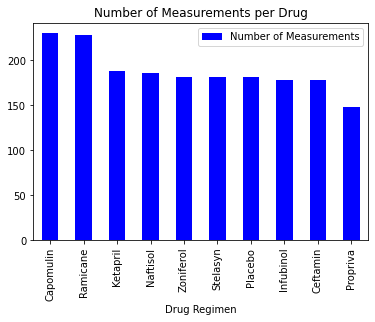

In [92]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total_measurements = clean_data_df.value_counts("Drug Regimen")

regimen_measurements = pd.DataFrame({"Drug Regimen": regimen, "Number of Measurements": total_measurements})

regimen_measurements.plot(kind='bar', title="Number of Measurements per Drug", color="blue")
plt.show()

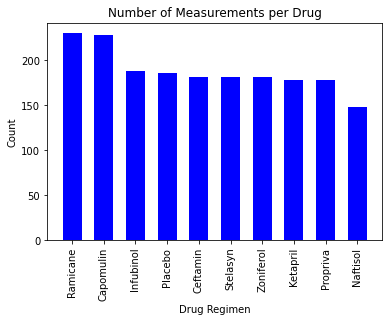

In [93]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = regimen
y_axis = total_measurements
plt.bar(x_axis, y_axis, color="blue", align="center", width= 0.60)
plt.xticks(rotation=90)

#set labels
plt.title("Number of Measurements per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

plt.show()

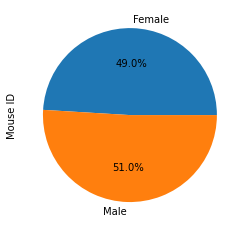

In [94]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_data_df.groupby(['Sex'])

gender['Mouse ID'].count().plot(kind='pie', subplots=True, autopct="%1.1f%%")
plt.show()

125
123


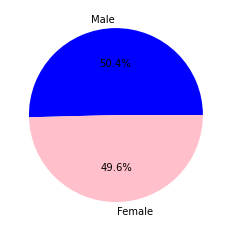

In [95]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = clean_data_df.groupby(['Mouse ID'])

sex_distribution = pd.DataFrame()

sex_distribution["Sex"] = gender['Sex'].unique()

(Male, Female) = sex_distribution['Sex'].value_counts()

print(Male)
print(Female)

sex_count = Male, Female
sex = ['Male', 'Female']
colors = ['blue', 'pink']

plt.pie(sex_count, labels=sex, colors=colors, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [96]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
four_regimens = clean_data_df.loc[(clean_data_df['Drug Regimen'] == 'Capomulin')|(clean_data_df['Drug Regimen'] == 'Ramicane')|
                              (clean_data_df['Drug Regimen'] == 'Infubinol')|(clean_data_df['Drug Regimen'] == 'Ceftamin')]
mouse_id = four_regimens.groupby(["Mouse ID"])
max_timepoint_df = pd.DataFrame()
max_timepoint_df['final_timepoint'] = mouse_id['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
new_df = pd.merge(clean_data_df, max_timepoint_df, on='Mouse ID')
drug_df = new_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)', 'final_timepoint']].loc[new_df['final_timepoint'] == new_df['Timepoint']]
drug_df
    

,Mouse ID,Drug Regimen,Tumor Volume (mm3),final_timepoint
9,k403,Ramicane,22.050126,45
19,s185,Capomulin,23.343598,45
29,x401,Capomulin,28.484033,45
39,m601,Capomulin,28.430964,45
49,g791,Ramicane,29.128472,45
...,...,...,...,...
773,x822,Ceftamin,61.386660,45
783,y163,Infubinol,67.685569,45
793,y769,Ceftamin,68.594745,45
803,y865,Ceftamin,64.729837,45


In [97]:
#Rename and drop unecessary columns
drug_df.columns = ["Mouse ID", "Drug Regimen", "Final Tumor Vol (mm3)",
                  "Final Timepoint"]

drug_df = drug_df.drop(columns=["Final Timepoint"])

drug_df

,Mouse ID,Drug Regimen,Final Tumor Vol (mm3)
9,k403,Ramicane,22.050126
19,s185,Capomulin,23.343598
29,x401,Capomulin,28.484033
39,m601,Capomulin,28.430964
49,g791,Ramicane,29.128472
...,...,...,...
773,x822,Ceftamin,61.386660
783,y163,Infubinol,67.685569
793,y769,Ceftamin,68.594745
803,y865,Ceftamin,64.729837


In [98]:
# Put treatments into a list for for loop (and later for plot labels)
four_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

counter = 0
#loop through each drug in list of four_drugs
for drug in four_drugs:
      
    final_tumor_vol = drug_df.loc[drug_df['Drug Regimen'] == drug]
    
    volumes = final_tumor_vol['Final Tumor Vol (mm3)']
    
    
    tumor_vol_data.append(volumes)
    
    
# Calculate the IQR and quantitatively determine if there are any potential outliers.     
    quartiles = volumes.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = round(lowerq - (1.5*iqr), 2)
    upper_bound = round(upperq + (1.5*iqr), 2)
    
    if counter == 0:
        
        print(f"----------------------------------------")
        
    print(f"IQR for {drug}:{iqr}")
    print(f"The lower quartile for {drug} is: {lowerq}")
    print(f"The upper quartile for {drug} is: {upperq}")
    print(f"Values below {lower_bound} could be outliers")
    print(f"Values above {upper_bound} could be outliers")
    

----------------------------------------
IQR for Capomulin:7.781863460000004
The lower quartile for Capomulin is: 32.37735684
The upper quartile for Capomulin is: 40.1592203
Values below 20.7 could be outliers
Values above 51.83 could be outliers
----------------------------------------
IQR for Ramicane:9.098536719999998
The lower quartile for Ramicane is: 31.56046955
The upper quartile for Ramicane is: 40.65900627
Values below 17.91 could be outliers
Values above 54.31 could be outliers
----------------------------------------
IQR for Infubinol:11.477135160000003
The lower quartile for Infubinol is: 54.04860769
The upper quartile for Infubinol is: 65.52574285
Values below 36.83 could be outliers
Values above 82.74 could be outliers
----------------------------------------
IQR for Ceftamin:15.577752179999997
The lower quartile for Ceftamin is: 48.72207785
The upper quartile for Ceftamin is: 64.29983003
Values below 25.36 could be outliers
Values above 87.67 could be outliers


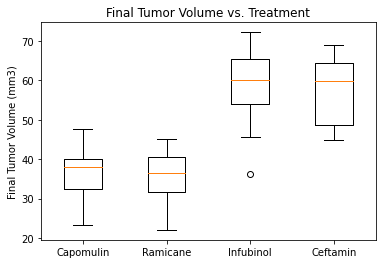

In [99]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_data)
plt.title("Final Tumor Volume vs. Treatment")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()
    
    

## Line and Scatter Plots

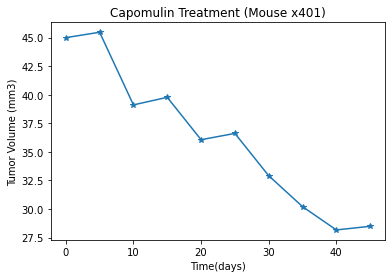

In [100]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = clean_data_df.loc[clean_data_df['Mouse ID'] == 'x401']

xaxis = mouse["Timepoint"]
yaxis = mouse["Tumor Volume (mm3)"]

plt.plot(xaxis, yaxis, marker="*")
plt.title("Capomulin Treatment (Mouse x401)")
plt.xlabel("Time(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

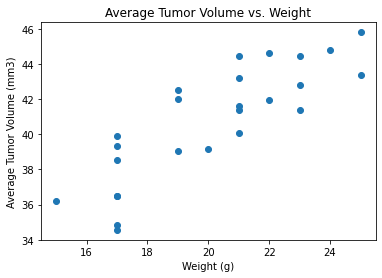

In [101]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#capomulin mice group
capomulin_df = clean_data_df.loc[clean_data_df["Drug Regimen"] == "Capomulin"]

#calculate average tumor volume per mouse
avg_tumor_vol = capomulin_df.groupby('Mouse ID')["Tumor Volume (mm3)"].mean()

weight = capomulin_df.groupby("Mouse ID")["Weight (g)"].unique()

xaxis = weight 
yaxis = avg_tumor_vol

#create scatter plot
plt.scatter(xaxis, yaxis)

#label and title graph
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Weight")

#display plot
plt.show()

## Correlation and Regression

In [104]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_df = clean_data_df.loc[clean_data_df["Drug Regimen"] == "Capomulin"]

avg_tumor_vol = capomulin_df.groupby('Mouse ID')["Tumor Volume (mm3)"].mean()

weight = capomulin_df.groupby("Mouse ID")["Weight (g)"].unique()

#define x and y 
xaxis = weight 
yaxis = avg_tumor_vol

(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = "+ str(round(slope,2)) + "x +" +str(round(intercept,2))


#create scatter plot
plt.scatter(xaxis, yaxis)
plt.plot(xaxis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

#label and title graph
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Weight")


print(f"The r-squared is: {rvalue**2}")
#display plot

plt.show()


AttributeError: 'float' object has no attribute 'shape'